In [66]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import sys

In [2]:
path = "/home/marius/Desktop/ma2501/Figures/"

### Problem 1a)

In [3]:
def phi(interval, nodes):
    #Interval is an array with 2 entries, could add an error message if interval is longer than 2
    #entries but seems unnecessary.
    t = np.full_like(np.arange(len(nodes), dtype=float), (interval[1]+interval[0])/2)
    return ((interval[1]-interval[0])/2)*nodes + t

In [4]:
def chebyshev(n):
    cheb = []
    for i in range(1, n+1):
        cheb += [np.cos(((2*i-1)/(2*n))*np.pi)]
    return np.array(sorted(cheb))

In [5]:
def runge(x):
    return (1/(x**2+1))

In [6]:
def lagInterp(x, y, evaluate):
    """
    Inputs: 
    x = an array of nodes
    y = the function evaluated at these nodes
    evaluate = points at which we evaluate the interpolation
    
    Outputs:
    solution = interpolation polynomial evaluated at the values in evaluate
    """
    solution = []
    for point in evaluate:
        val = 0
        for i in range(len(x)):
            li = 1
            for j in range(len(x)):
                if(j==i):
                    continue
                if(x[i]==x[j]):
                    print("Divide by zero!", i, j)
                li = li*((point-x[j])/(x[i]-x[j]))
        
            val += li*y[i]
        solution += [val]
    return np.array(solution)

In [7]:
#Smooth function
def smooth(x):
    return np.exp(x)

In [8]:
#Testing for the a smooth function on [-1, 1] with equidistant nodes
x = np.linspace(-1, 1, 10)
y = smooth(np.linspace(-1,1,10))
test = lagInterp(x, y, np.linspace(-1,1,100) )

Text(0.5, 1.0, 'Interpolation')

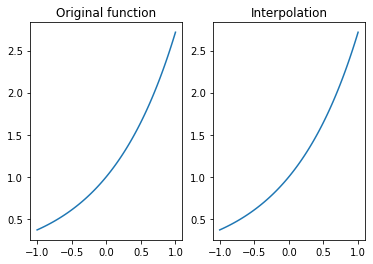

In [9]:
plt.subplot(1,2,1)
plt.plot(np.linspace(-1,1,100), smooth(np.linspace(-1,1,100)))
plt.title("Original function")

plt.subplot(1,2,2)
plt.plot(np.linspace(-1,1,100),test)
plt.title("Interpolation")

Text(0.5, 1.0, 'Interpolation')

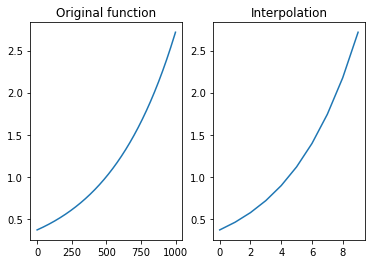

In [10]:
#Testing for the smooth function on [-1, 1] with Chebyshev nodes
x = chebyshev(10)
y = smooth(x)
test = lagInterp(x, y, np.linspace(-1,1,10))
y_true = smooth(np.linspace(-1,1,1000))

plt.subplot(1,2,1)
plt.plot(y_true)
plt.title("Original function")

plt.subplot(1,2,2)
plt.plot(test)
plt.title("Interpolation")

In [11]:
#Implementing for the Runge function on the interval [-5,5] for n=10
n = 10
x_cheb = phi([-5, 5], chebyshev(n))
y_cheb = runge(x_cheb)
eval_cheb = np.linspace(-5,5,100)
cheb = lagInterp(x_cheb, y_cheb, eval_cheb)

x_equi = np.linspace(-5,5, n)
y_equi = runge(x_equi)
eval_equi = np.linspace(-5,5,100)
equi = lagInterp(x, y, eval_equi)

x_true = np.linspace(-5,5,1000)
y_true = runge(x_true)

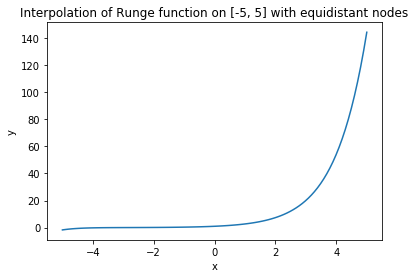

In [12]:
plt.plot(eval_equi, equi)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Interpolation of Runge function on [-5, 5] with equidistant nodes")
plt.savefig(path+"runge_a")
#We see that the interpolation on equidistant nodes diverges

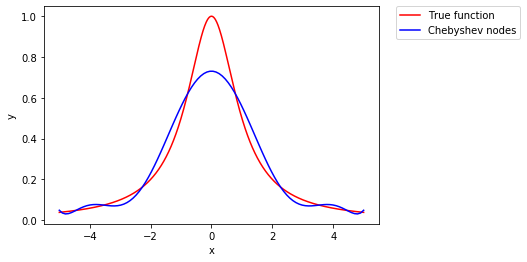

In [13]:
plt.plot(x_true, y_true, 'r', label = "True function")
plt.plot(eval_cheb, cheb, 'b', label = "Chebyshev nodes")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel("x")
plt.ylabel("y")
plt.savefig(path+"runge_a_2")
#Chebyshev nodes converge

Text(0, 0.5, 'y')

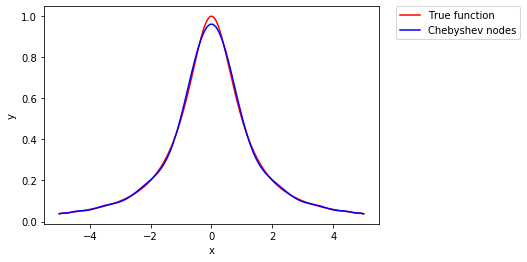

In [14]:
#If we increase n:
#Implementing for the Runge function on the interval [-5,5] for n=20
n = 20
x_cheb = phi([-5, 5], chebyshev(n))
y_cheb = runge(x_cheb)
eval_cheb = np.linspace(-5,5,100)
cheb = lagInterp(x_cheb, y_cheb, eval_cheb)

x_equi = np.linspace(-5,5, n)
y_equi = runge(x_equi)
eval_equi = np.linspace(-5,5,100)
equi = lagInterp(x, y, eval_equi)

x_true = np.linspace(-5,5,1000)
y_true = runge(x_true)
plt.plot(x_true, y_true, 'r', label = "True function")
plt.plot(eval_cheb, cheb, 'b', label = "Chebyshev nodes")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel("x")
plt.ylabel("y")
#We get good convergence at high n

Text(0, 0.5, 'y')

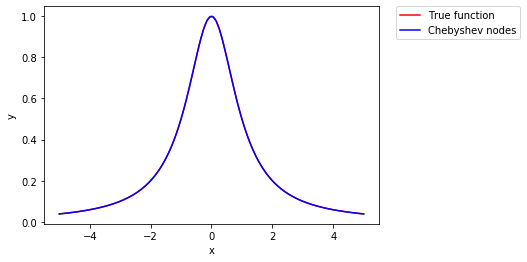

In [15]:
#At a major increase in n, n=50:
n = 50
x_cheb = phi([-5, 5], chebyshev(n))
y_cheb = runge(x_cheb)
eval_cheb = np.linspace(-5,5,100)
cheb = lagInterp(x_cheb, y_cheb, eval_cheb)

x_equi = np.linspace(-5,5, n)
y_equi = runge(x_equi)
eval_equi = np.linspace(-5,5,100)
equi = lagInterp(x, y, eval_equi)

x_true = np.linspace(-5,5,1000)
y_true = runge(x_true)
plt.plot(x_true, y_true, 'r', label = "True function")
plt.plot(eval_cheb, cheb, 'b', label = "Chebyshev nodes")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel("x")
plt.ylabel("y")
#We get great perormance

### Problem 1b)

In [16]:
#Problem 1b
def f_1(x):
    return np.cos(2*np.pi*x)
    
def f_2(x):
    return (np.exp(3*x))*np.sin(2*x)

In [17]:
def infNorm(function, interpolation):
    #Takes in the given function and interpolation of 
    #that function at given points and calculates the max norm
    return np.max(np.abs(function - interpolation))

def twoNorm(function, interpolation, interval):
    #Takes in the given function, interpolation of 
    #that function at given points, and the interval and calculates the two norm
    return (np.sqrt(interval[1]-interval[0])/np.sqrt(len(function)))*((np.sum((function-interpolation)**2))**2)

n =  1
n =  2
n =  3
n =  4
n =  5
n =  6
n =  7
n =  8
n =  9
n =  10
n =  11
n =  12
n =  13
n =  14
n =  15
n =  16
n =  17
n =  18
n =  19
n =  20
n =  21
n =  22
n =  23
n =  24
n =  25
n =  26
n =  27
n =  28
n =  29
n =  30
n =  31
n =  32
n =  33
n =  34
n =  35
n =  36
n =  37
n =  38
n =  39


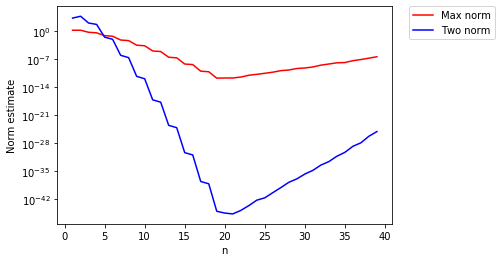

In [18]:
#Making estimated error plots for equidistant nodes
nVals = np.arange(1, 40, 1)

iNorm = []
tNorm = []
#For function f_1
for n in nVals:
    print("n = ", n)
    nLarge = 100*n
    
    x = np.linspace(0, 1, n)
    y = f_1(x)
    manyPoints = np.linspace(0, 1,nLarge)
    interpolation = lagInterp(x, y, manyPoints)
    iNorm += [infNorm(f_1(manyPoints), interpolation)]
    tNorm += [twoNorm(f_1(manyPoints), interpolation, [0,1])]
    

plt.semilogy(nVals, iNorm, 'r', label="Max norm")
plt.semilogy(nVals, tNorm, 'b', label="Two norm")
plt.xlabel("n")
plt.ylabel("Norm estimate")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

n =  1
n =  2
n =  3
n =  4
n =  5
n =  6
n =  7
n =  8
n =  9
n =  10
n =  11
n =  12
n =  13
n =  14
n =  15
n =  16
n =  17
n =  18
n =  19
n =  20
n =  21
n =  22
n =  23
n =  24
n =  25
n =  26
n =  27
n =  28
n =  29
n =  30
n =  31
n =  32
n =  33
n =  34
n =  35
n =  36
n =  37
n =  38
n =  39


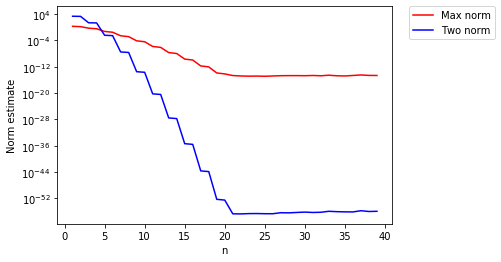

In [19]:
#Making estimated error plots for chebyshev nodes
nVals = np.arange(1, 40, 1)

iNorm = []
tNorm = []
#For function f_1
for n in nVals:
    print("n = ", n)
    nLarge = 100*n
    
    x = phi([0,1],chebyshev(n))
    y = f_1(x)
    manyPoints = np.linspace(0, 1,nLarge)
    interpolation = lagInterp(x, y, manyPoints)
    iNorm += [infNorm(f_1(manyPoints), interpolation)]
    tNorm += [twoNorm(f_1(manyPoints), interpolation, [0,1])]
    

plt.semilogy(nVals, iNorm, 'r', label="Max norm")
plt.semilogy(nVals, tNorm, 'b', label="Two norm")
plt.xlabel("n")
plt.ylabel("Norm estimate")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

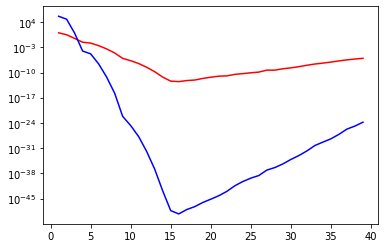

In [36]:
#For function f_2 equidistant nodes
iNorm = np.array([])
tNorm = np.array([])
for n in nVals:
    nLarge = 100*n
    x = np.linspace(0, np.pi/4, n)
    y = f_2(x)
    manyPoints = np.linspace(0, np.pi/4,nLarge)
    interpolation = lagInterp(x, y, manyPoints)
    tNorm = np.append(tNorm,twoNorm(f_2(manyPoints), interpolation, [0,1]))
    iNorm = np.append(iNorm,infNorm(f_2(manyPoints), interpolation))
                              


plt.semilogy(nVals, iNorm, 'r', label="Max norm")
plt.semilogy(nVals, tNorm, 'b', label="Two norm")
plt.xlabel("n")
plt.ylabel("Norm estimate")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

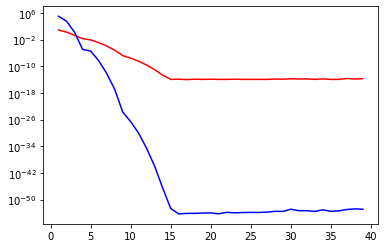

In [37]:
#For function f_2 chebyshev nodes
iNorm = np.array([])
tNorm = np.array([])
for n in nVals:
    nLarge = 100*n
    x = phi([0, np.pi/4], chebyshev(n))
    y = f_2(x)
    manyPoints = np.linspace(0, np.pi/4,nLarge)
    interpolation = lagInterp(x, y, manyPoints)
    tNorm = np.append(tNorm,twoNorm(f_2(manyPoints), interpolation, [0,1]))
    iNorm = np.append(iNorm,infNorm(f_2(manyPoints), interpolation))
                              


plt.semilogy(nVals, iNorm, 'r', label="Max norm")
plt.semilogy(nVals, tNorm, 'b', label="Two norm")
plt.xlabel("n")
plt.ylabel("Norm estimate")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

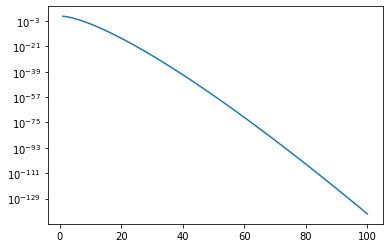

In [38]:
#Calculating for well known error bound
def error_bound_f_1(n):
    return np.pi**(n+1)/((2**n)*np.math.factorial(n+1))

n = np.linspace(1,100, 100)
vec_1 = np.vectorize(error_bound_f_1)
plt.semilogy(n, vec_1(n))

### Problem 1c)

In [20]:
def pieceWise(numberOfSubintervals, interval, function, nodes=5):
    solution = np.array([])
    functionPoints = np.array([])
    subIntervals = np.linspace(interval[0], interval[1], numberOfSubintervals)
    for i in range(1, len(subIntervals)):
        x = np.linspace(subIntervals[i-1],subIntervals[i],nodes+1)
        y = function(x)
        interpolation = lagInterp(x, y, np.linspace(subIntervals[i-1],subIntervals[i],nodes*10))
        subIntPoints = np.linspace(subIntervals[i-1],subIntervals[i],nodes*10)
        solution = np.append(solution, interpolation)
        functionPoints = np.append(functionPoints, subIntPoints)
    return solution, functionPoints, infNorm(function(functionPoints), solution), twoNorm(function(functionPoints), solution, interval)

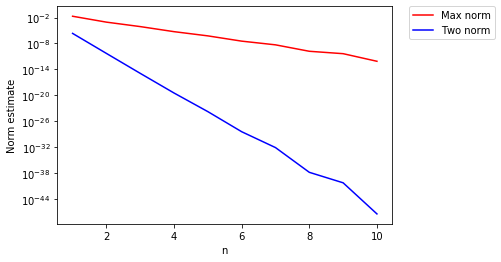

In [27]:
#For n = [1, ..10], we observe the difference in n for K=5 for the interval [0,1] and the runge function
infList = np.array([])
twoList = np.array([])
n_vals = np.arange(1, 11, 1)

for n in n_vals:
    _, _, infl, twol = pieceWise(8, [-1,1], runge, n)
    infList = np.append(infList, infl)
    twoList = np.append(twoList, twol)
plt.semilogy(n_vals, infList, 'r',  label = "Max norm")
plt.semilogy( n_vals, twoList, 'b', label = "Two norm")
plt.xlabel("n")
plt.ylabel("Norm estimate")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

We are on k= 2
We are on k= 3
We are on k= 4
We are on k= 5
We are on k= 6
We are on k= 7
We are on k= 8
We are on k= 9
We are on k= 10
We are on k= 11
We are on k= 12
We are on k= 13
We are on k= 14
We are on k= 15
We are on k= 16
We are on k= 17
We are on k= 18
We are on k= 19
We are on k= 20
We are on k= 2
We are on k= 3
We are on k= 4
We are on k= 5
We are on k= 6
We are on k= 7
We are on k= 8
We are on k= 9
We are on k= 10
We are on k= 11
We are on k= 12
We are on k= 13
We are on k= 14
We are on k= 15
We are on k= 16
We are on k= 17
We are on k= 18
We are on k= 19
We are on k= 20
We are on k= 2
We are on k= 3
We are on k= 4
We are on k= 5
We are on k= 6
We are on k= 7
We are on k= 8
We are on k= 9
We are on k= 10
We are on k= 11
We are on k= 12
We are on k= 13
We are on k= 14
We are on k= 15
We are on k= 16
We are on k= 17
We are on k= 18
We are on k= 19
We are on k= 20
We are on k= 2
We are on k= 3
We are on k= 4
We are on k= 5
We are on k= 6
We are on k= 7
We are on k= 8
We are 

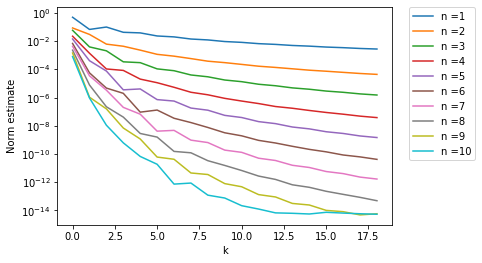

In [26]:
#We observe the behaviour at various n as k goes to infinity for the runge function
    
kVals = np.arange(2, 21)

for n in np.arange(1,11,1):
    normList = np.array([])
    for k in kVals:
        _, _, normval, _ = pieceWise(k, [-1,1], runge, n)
        normList = np.append(normList, normval)
        print("We are on k=", k)
    plt.semilogy(normList, label="n ="+str(n))
    plt.xlabel("k")
    plt.ylabel("Norm estimate")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

In [23]:
#Fixing n=10, we observe the the norm as k goes to infinity
normList = np.array([])
kVals = np.arange(2, 21)
for k in kVals:
    _, _, normval, _ = pieceWise(k, [-1,1], runge, 10)
    normList = np.append(normList, normval)
    print("We are on k=", k)

We are on k= 2
We are on k= 3
We are on k= 4
We are on k= 5
We are on k= 6
We are on k= 7
We are on k= 8
We are on k= 9
We are on k= 10
We are on k= 11
We are on k= 12
We are on k= 13
We are on k= 14
We are on k= 15
We are on k= 16
We are on k= 17
We are on k= 18
We are on k= 19
We are on k= 20


Text(0, 0.5, 'Norm estimate')

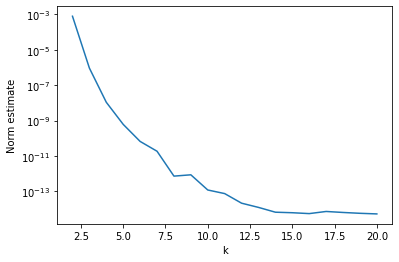

In [24]:
plt.semilogy(kVals, normList)
plt.xlabel("k")
plt.ylabel("Norm estimate")

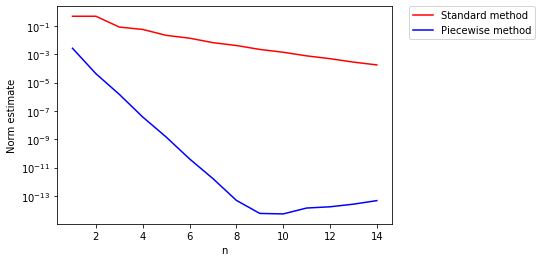

In [25]:
#Comparing the methods in b) and c) for k=8 using the runge function
normListStandard = np.array([])
normListPiecewise = np.array([])
nVals = np.arange(1,15, 1)
for n in nVals:
    _, _, normval, _ = pieceWise(k, [-1,1], runge, n)
    normListPiecewise = np.append(normListPiecewise, normval)
    
    nLarge = 100*n
    x = np.linspace(-1, 1, n)
    y = runge(x)
    manyPoints = np.linspace(-1, 1,nLarge)
    interpolation = lagInterp(x, y, manyPoints)
    normListStandard = np.append(normListStandard, infNorm(runge(manyPoints), interpolation))


plt.semilogy(nVals, normListStandard, 'r', label = "Standard method")
plt.semilogy(nVals, normListPiecewise, 'b', label = "Piecewise method")
plt.xlabel("n")
plt.ylabel("Norm estimate")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

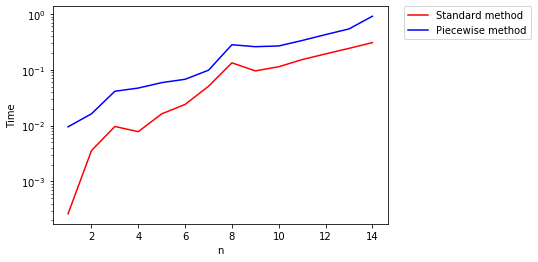

In [68]:
#Comparing time it takes to run each algorithm
time_piecwise = np.array([])
time_lagrangian = np.array([])

for n in nVals:
    piece = time.time()
    _, _, _, _ = pieceWise(k, [-1,1], runge, n)
    time_piecwise = np.append(time_piecwise, time.time() - piece)
    
    nLarge = 100*n
    x = np.linspace(-1, 1, n)
    y = runge(x)
    manyPoints = np.linspace(-1, 1,nLarge)
    lagrangian = time.time()
    interpolation = lagInterp(x, y, manyPoints)
    time_lagrangian = np.append(time_lagrangian, time.time() - lagrangian)

plt.semilogy(nVals, time_lagrangian, 'r', label = "Standard method")
plt.semilogy(nVals, time_piecwise, 'b', label = "Piecewise method")
plt.xlabel("n")
plt.ylabel("Time")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

### Problem 1d)

In [34]:
import autograd.numpy as np   # Thinly-wrapped version of Numpy
from autograd import grad

In [35]:
def interp(x, eta, function):
    """
    A more general interpolation function than the one used in earlier problems
    
    Input:
    x = an array of nodes
    eta = an array of values at which to evaluate the interpolation
    function = the function we wish to interpolate
    
    Output:
    poly = the interpolated polynomial evaluated in eta
    """
    
    poly = 0
    for i in range(len(x)):
        li = 1
        for j in range(len(x)):
            if(i==j):
                continue
            if((x[i]-x[j])==0.0):
                print("Divide by 0 at",i,j)
            li = li*((eta-x[j])/(x[i]-x[j]))
        poly += li*function(x[i])
    return poly
        

def cost(x, eta, interval, function):
    """
    The cost function as described in the project document
    
    Input:
    x = an array of nodes
    eta = an array of values at which to evaluate the interpolation
    interval = the interval in which we evaluate the function
    function = the function we wish to interpolate
    
    Output:
    the error of our interpolation
    """
    val = 0
    for i in range(len(eta)):
        val += (function(eta[i])-interp(x, eta[i], function))**2
    return ((interval[1]-interval[0])/len(eta))*val

In [36]:
def new_gradient_descent(x, eta, interval, function, max_iter = 25, tol = 1e-7):
    """
    Gradient descent with armijo backtracking
    
    Input:
    x = an array of nodes
    eta = an array of values at which to evaluate the interpolation
    interval = the interval in which we evaluate the function
    function = the function we wish to interpolate
    max_iter = maximum number of iterations after which we return the current solution
    tol = tolerance which we compare the norm of the gradient to to determine when we exit the algorithm
    
    Output:
    x = an array of nodes
    cost_list = a list of the values of the cost function at each iteration
    norm_list = a list of the norm of the gradient of the cost function at each iteration
    """
    
    c = 1e-4
    gradient = grad(cost, 0)
    p_k = -(gradient(x, eta, interval, function))
    
    cost_val = cost(x, eta, interval, function)
    cost_list = np.array([cost_val])
    norm_p_k = np.linalg.norm(p_k)
    norm_list = np.array([norm_p_k])
    while norm_p_k>tol and max_iter > 0:
        alpha = 10
        print("We are counting down from iteration", max_iter)
        print("This is norm", norm_p_k)
        print("This is x", x)
        rhs = (cost_val+c*alpha*((-p_k.T)@p_k))
        while(cost(x+alpha*p_k, eta, interval, function))>rhs:
            print("We are in backtrack", alpha)
            alpha = alpha*0.5
            rhs = (cost_val+c*alpha*((-p_k.T)@p_k))
            
        
        x = x + alpha*p_k
        cost_val = cost(x, eta, interval, function)
        p_k = -(gradient(x, eta, interval, function))
        norm_p_k = np.linalg.norm(p_k)
        norm_list = np.append(norm_list, norm_p_k)
        cost_list = np.append(cost_list, cost_val)
        max_iter-=1
    return x, norm_list, cost_list

In [37]:
#Testing with mildly ill conditioned starting points
x = np.linspace(-1, 1, 5)
eta = np.linspace(0.5,1,100)
ill_conditioned, grad_val, costs = new_gradient_descent(x, eta, [-1,1], runge)
#We see that it converges to points slightly outside our desired interval

This is norm 0.006959304310451877
This is x [-1.  -0.5  0.   0.5  1. ]
This is norm 0.0017903388508435025
This is x [-1.00530577e+00 -5.05892740e-01 -2.78913722e-18  5.29203124e-01
  9.37330281e-01]
This is norm 0.0011688504729740826
This is x [-1.00735761e+00 -5.08221873e-01 -1.53355432e-04  5.42115665e-01
  9.25324485e-01]
This is norm 0.0010305402831884013
This is x [-1.00907523e+00 -5.10166395e-01 -2.77032122e-04  5.53046187e-01
  9.22099864e-01]
This is norm 0.0009577449235493242
This is x [-1.01061583e+00 -5.11903144e-01 -3.60219077e-04  5.63070794e-01
  9.21541380e-01]
This is norm 0.0008943531123763532
This is x [-1.01201642e+00 -5.13475368e-01 -4.04621006e-04  5.72407076e-01
  9.21896160e-01]
This is norm 0.000832980327411982
This is x [-1.01329876e+00 -5.14909156e-01 -4.15449486e-04  5.81115068e-01
  9.22572440e-01]
This is norm 0.0007729593399231832
This is x [-1.01448071e+00 -5.16225939e-01 -3.98249942e-04  5.89217669e-01
  9.23348495e-01]
This is norm 0.0007146342033795803

In [600]:
#Testing with ill conditioned starting points
x = np.linspace(-1, 1, 5)
eta = np.linspace(-2,2,100)
ill_conditioned, grad_val = new_gradient_descent(x, eta, [-1,1], runge)

This is norm 7.345952690788938
This is x [-1.  -0.5  0.   0.5  1. ]
This is norm 0.00025285732636316267
This is x [-4.54222930e+01 -2.74223128e+01 -3.10862447e-14  2.74223128e+01
  4.54222930e+01]
This is norm 0.00025290344915038373
This is x [-4.54219093e+01 -2.74205665e+01 -1.13588263e-12  2.74205665e+01
  4.54219093e+01]
This is norm 0.0002529495925767612
This is x [-4.54215256e+01 -2.74188199e+01 -4.15770025e-11  2.74188199e+01
  4.54215256e+01]
This is norm 0.0002529957567146307
This is x [-4.54211418e+01 -2.74170729e+01 -1.52192272e-09  2.74170729e+01
  4.54211418e+01]
This is norm 0.00025304201914749287
This is x [-4.54207581e+01 -2.74153256e+01 -5.57098679e-08  2.74153256e+01
  4.54207581e+01]
This is norm 0.0002531922754404222
This is x [-4.54203743e+01 -2.74135780e+01 -2.03925351e-06  2.74135780e+01
  4.54203743e+01]
This is norm 0.00036703523761029395
This is x [-4.54199906e+01 -2.74118301e+01 -7.46465694e-05  2.74118300e+01
  4.54199905e+01]
This is norm 0.00973172389149588

KeyboardInterrupt: 

In [40]:
eta = np.linspace(-1, 1, 1000)
x = np.linspace(-1,1,6)

In [41]:
interp_gd, grad_val, costs = new_gradient_descent(x, eta, [-1,1], runge)

This is norm 0.0009486908165617671
This is x [-1.  -0.6 -0.2  0.2  0.6  1. ]
This is norm 0.0008529264097663063
This is x [-0.99398486 -0.60284451 -0.20085298  0.20085298  0.60284451  0.99398486]
This is norm 0.000770013350128638
This is x [-0.98853659 -0.60531518 -0.2016187   0.2016187   0.60531518  0.98853659]
This is norm 0.0006976150510389784
This is x [-0.98358713 -0.60747572 -0.20231219  0.20231219  0.60747572  0.98358713]
This is norm 0.0006339340669064142
This is x [-0.97907973 -0.60937724 -0.2029454   0.2029454   0.60937724  0.97907973]
This is norm 0.0005775670416936804
This is x [-0.97496647 -0.61106111 -0.20352785  0.20352785  0.61106111  0.97496647]
This is norm 0.000527403154949637
This is x [-0.97120638 -0.61256109 -0.20406726  0.20406726  0.61256109  0.97120638]
This is norm 0.0004825517957386205
This is x [-0.96776412 -0.61390492 -0.20456995  0.20456995  0.61390492  0.96776412]
This is norm 0.00044229026274470574
This is x [-0.96460893 -0.61511554 -0.20504107  0.205041

Text(0, 0.5, 'Value of the norm of the gradient of the cost function')

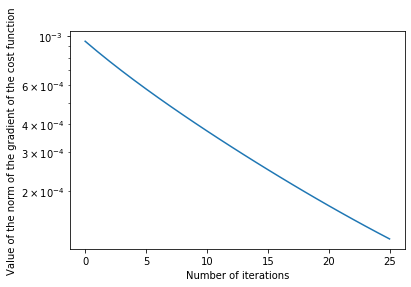

In [42]:
#Plot of the change in gradient
plt.semilogy(grad_val)
plt.xlabel("Number of iterations")
plt.ylabel("Value of the norm of the gradient of the cost function")

Text(0, 0.5, 'Value of cost function')

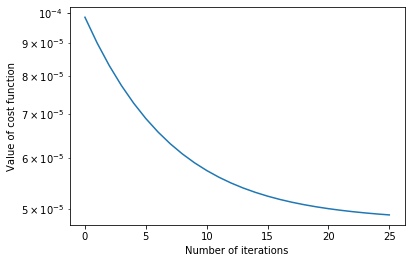

In [43]:
#Plot of the change in cost function
plt.semilogy(costs)
plt.xlabel("Number of iterations")
plt.ylabel("Value of cost function")

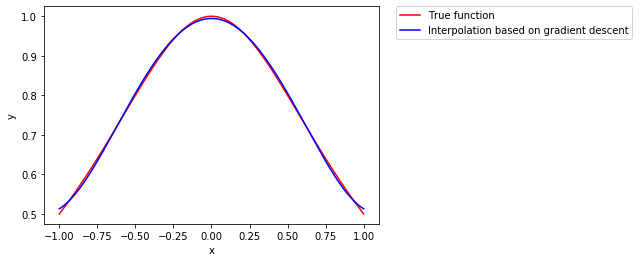

In [45]:
#Plotting the interpolation function versus the true function

x_true = np.linspace(-1,1,1000)
y_true = runge(x_true)
plt.plot(x_true, y_true, 'r', label="True function")
plt.plot(eta, interp(interp_gd, eta, runge), 'b', label = "Interpolation based on gradient descent")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

In [50]:
#Adapting the piecewise function for gradient descent
#x, eta, interval, function, max_iter = 40, tol = 1e-7
def pieceWise_gd(numberOfSubintervals, interval, function, nodes=4):
    solution = np.array([])
    functionPoints = np.array([])
    subIntervals = np.linspace(interval[0], interval[1], numberOfSubintervals)
    for i in range(1, len(subIntervals)):
        #x = phi([subIntervals[i-1],subIntervals[i]], chebyshev(nodes+1))
        x = np.linspace(subIntervals[i-1],subIntervals[i],nodes+1)
        eta = np.linspace(interval[0], interval[1], 100)
        x, _, _ = new_gradient_descent(x, eta,[subIntervals[i-1], subIntervals[i]] , function, 10, 1e-5)      
        y = function(x)
        interpolation = lagInterp(x, y, np.linspace(subIntervals[i-1],subIntervals[i],nodes*10))
        subIntPoints = np.linspace(subIntervals[i-1],subIntervals[i],nodes*10)
        solution = np.append(solution, interpolation)
        functionPoints = np.append(functionPoints, subIntPoints)
    return solution, functionPoints, infNorm(function(functionPoints), solution), twoNorm(function(functionPoints), solution, interval)

In [59]:
#Test of piecewise gd
solution, func_points, iNorm, tNorm = pieceWise_gd(4, [-1,1], runge)

This is norm 0.3069339487952969
This is x [-1.         -0.92857143 -0.85714286 -0.78571429 -0.71428571]
We are in backtrack 10
We are in backtrack 5.0
We are in backtrack 2.5
This is norm 0.19400106409933165
This is x [-1.15253869 -1.09020733 -1.0281242  -0.96614443 -0.90406672]
This is norm 0.004184142938957255
This is x [-0.40520256 -0.28936352 -0.16946352 -0.04496142  0.08482301]
We are in backtrack 10
This is norm 0.002604203596391405
This is x [-0.4040075  -0.28406965 -0.16072617 -0.03332338  0.09883864]
This is norm 0.0039041693130156163
This is x [-0.42469478 -0.29756786 -0.16833115 -0.03583662  0.10080609]
We are in backtrack 10
This is norm 0.0023695427087907636
This is x [-0.42438764 -0.2929532  -0.16023991 -0.02489805  0.11401796]
This is norm 0.0031309775785333684
This is x [-0.44378046 -0.30472803 -0.16604086 -0.02567851  0.11755134]
This is norm 0.004231693122542915
This is x [-0.44717259 -0.29930852 -0.15382939 -0.00804325  0.13944431]
This is norm 0.0062682721409345644


In [ ]:
#Test of piecewise gd
solution, func_points, iNorm, tNorm = pieceWise_gd(8, [-1,1], runge)

In [63]:
n_vals = np.arange(2, 8)

i_norm_list = np.array([])
t_norm_list = np.array([])
for n in n_vals:
    _, _, iNorm, tNorm = pieceWise_gd(8, [-1,1], runge, n)
    i_norm_list = np.append(i_norm_list, iNorm)
    t_norm_list = np.append(t_norm_list, tNorm)


This is norm 0.1337415713156695
This is x [-1.         -0.85714286 -0.71428571]
This is norm 0.013768416016705627
This is x [-0.54408752 -0.15763232  0.33046766]
This is norm 0.009580656269451308
This is x [-0.66059646 -0.23090496  0.32676435]
This is norm 0.005175399170922575
This is x [-0.73266757 -0.28827186  0.30042631]
This is norm 0.0015342070562737037
This is x [-0.76856057 -0.31850111  0.27860063]
This is norm 0.0008254319176083439
This is x [-0.78218615 -0.32489454  0.27562626]
This is norm 0.0007441968813415229
This is x [-0.78947793 -0.32426038  0.27944222]
This is norm 0.0006717634652914958
This is x [-0.79585827 -0.32335439  0.28316423]
This is norm 0.0006058086093772383
This is x [-0.80162865 -0.32250657  0.28649748]
This is norm 0.0005458654553294992
This is x [-0.80684326 -0.32172647  0.28948071]
This is norm 0.2533891304950736
This is x [-0.71428571 -0.57142857 -0.42857143]
We are in backtrack 10
This is norm 0.020985797058366906
This is x [-0.15366768  0.13542764  0.4

This is norm 0.000815834280163613
This is x [-0.78116457 -0.68537148 -0.58700626 -0.4847767 ]
This is norm 0.001982230081007845
This is x [-0.78704986 -0.68920534 -0.58770502 -0.48068583]
We are in backtrack 10
We are in backtrack 5.0
This is norm 0.060709946808794275
This is x [-0.42857143 -0.33333333 -0.23809524 -0.14285714]
This is norm 0.02008539264530607
This is x [-0.35943296 -0.15614078  0.07610858  0.34053545]
This is norm 0.023045328889056502
This is x [-0.38203353 -0.12544126  0.16779007  0.51513086]
This is norm 0.016336009122441028
This is x [-0.56952694 -0.24459983  0.10652047  0.51661685]
This is norm 0.007102444803583631
This is x [-0.57439326 -0.21489611  0.17614684  0.66129821]
This is norm 0.004880983487824878
This is x [-0.63320144 -0.24117071  0.17260998  0.69101699]
This is norm 0.003816511842253589
This is x [-0.66754867 -0.25227967  0.1780161   0.72342121]
This is norm 0.0030406924811979584
This is x [-0.69432484 -0.26014153  0.18340809  0.74889139]
This is norm 

This is norm 0.005598944729905126
This is x [-0.51280994 -0.34440394 -0.17470192 -0.00220657  0.17181301]
We are in backtrack 10
This is norm 0.001967494501564506
This is x [-0.50906984 -0.33561648 -0.16213972  0.01316537  0.18908702]
This is norm 0.001976711862266519
This is x [-0.52577042 -0.3443417  -0.16539597  0.01420719  0.19360103]
This is norm 0.0019449031258274535
This is x [-0.53453953 -0.34444022 -0.15962935  0.02434279  0.20693698]
This is norm 0.0018712174998694719
This is x [-0.55121556 -0.35310243 -0.16320097  0.02468764  0.21043923]
This is norm 0.006269429145037666
This is x [-1.42857143e-01 -7.14285714e-02 -5.55111512e-17  7.14285714e-02
  1.42857143e-01]
This is norm 0.007476781253805083
This is x [-1.82538677e-01 -9.11937660e-02  1.05687681e-12  9.11937660e-02
  1.82538677e-01]
This is norm 0.008486140617485144
This is x [-2.29896831e-01 -1.14695217e-01  1.80294668e-12  1.14695217e-01
  2.29896831e-01]
This is norm 0.009044529500544065
This is x [-2.83716383e-01 -1.

This is norm 0.0019759518693276404
This is x [-0.56963267 -0.50806896 -0.44436722 -0.37823533 -0.30939019 -0.23756414]
We are in backtrack 10
We are in backtrack 5.0
We are in backtrack 2.5
We are in backtrack 1.25
This is norm 0.0005160154063529393
This is x [-0.56935097 -0.50772639 -0.44395216 -0.37773346 -0.30878386 -0.23683157]
We are in backtrack 10
This is norm 0.0019496878494717762
This is x [-0.57098158 -0.50907637 -0.44493139 -0.37822528 -0.30863808 -0.23585514]
We are in backtrack 10
We are in backtrack 5.0
We are in backtrack 2.5
We are in backtrack 1.25
This is norm 0.0005163516196667887
This is x [-0.57070751 -0.50874168 -0.44452429 -0.37773113 -0.30803876 -0.23512806]
We are in backtrack 10
This is norm 0.0018947930221021032
This is x [-0.57233257 -0.51008598 -0.44549661 -0.37821273 -0.30787578 -0.23412129]
We are in backtrack 10
We are in backtrack 5.0
We are in backtrack 2.5
We are in backtrack 1.25
This is norm 0.0005152783764903327
This is x [-0.57207273 -0.50976615 -

This is norm 0.0073252500050001125
This is x [-0.37598366 -0.28757229 -0.19812726 -0.10722737 -0.01469376  0.07949702
  0.17531735]
We are in backtrack 10
This is norm 0.0016203623161601185
This is x [-0.39359262 -0.3036867  -0.21293098 -0.12078641 -0.02700964  0.06845064
  0.16556896]
This is norm 0.0019524693730284689
This is x [-0.39920764 -0.30559032 -0.21166942 -0.11677861 -0.02063769  0.07680651
  0.17553535]
This is norm 0.002619528772411173
This is x [-0.4129619  -0.31587376 -0.21904725 -0.12162756 -0.02325961  0.07613289
  0.17654133]
This is norm 0.0034239060370218114
This is x [-0.41397504 -0.31283027 -0.21262185 -0.11233584 -0.01157841  0.08973063
  0.19160562]
This is norm 0.5678686402337292
This is x [-0.42857143 -0.38095238 -0.33333333 -0.28571429 -0.23809524 -0.19047619
 -0.14285714]
We are in backtrack 10
We are in backtrack 5.0
This is norm 0.31799343117404283
This is x [-0.0266596   0.05904584  0.14738112  0.23832215  0.33181614  0.42778936
  0.52616009]
We are in ba

This is norm 0.053134180415336754
This is x [1.35310274 1.49114505 1.63550027 1.78622249 1.94329089 2.10662953
 2.27608562 2.4514483 ]
We are in backtrack 10
We are in backtrack 5.0
We are in backtrack 2.5
We are in backtrack 1.25
This is norm 0.006794251693159614
This is x [1.33515692 1.47582728 1.62241317 1.77502286 1.93368498 2.09836781
 2.26895732 2.44527611]
We are in backtrack 10
We are in backtrack 5.0
We are in backtrack 2.5
This is norm 0.008483072234109362
This is x [1.33725583 1.47856046 1.62550739 1.77828496 1.9369814  2.10160891
 2.27208536 2.44825622]
We are in backtrack 10
We are in backtrack 5.0
We are in backtrack 2.5
We are in backtrack 1.25
This is norm 0.002831643311811131
This is x [1.33368752 1.47588583 1.62351812 1.77681997 1.93591637 2.10084813
 2.27155529 2.44790048]
We are in backtrack 10
This is norm 0.009538173983486437
This is x [1.32879123 1.47522661 1.62576625 1.78100467 1.9413337  2.1069925
 2.27806798 2.4545311 ]
We are in backtrack 10
We are in backtra

This is norm 0.0060574446772243265
This is x [0.15668096 0.19772081 0.23868006 0.27956428 0.32037968 0.36113294
 0.401831   0.44248094]
We are in backtrack 10
We are in backtrack 5.0
We are in backtrack 2.5
We are in backtrack 1.25
This is norm 0.004041550699834765
This is x [0.15802119 0.19907283 0.2400369  0.28091962 0.32172782 0.36246888
 0.40315041 0.44378013]
We are in backtrack 10
We are in backtrack 5.0
We are in backtrack 2.5
We are in backtrack 1.25
This is norm 0.0027368136428271824
This is x [0.1569792  0.19807665 0.23908578 0.28001275 0.32086431 0.36164773
 0.40237054 0.44304037]
We are in backtrack 10
We are in backtrack 5.0
We are in backtrack 2.5
We are in backtrack 1.25
This is norm 0.001841059609354708
This is x [0.15753484 0.19865494 0.23968184 0.28062208 0.32148284 0.3622718
 0.40299692 0.44366624]
We are in backtrack 10
We are in backtrack 5.0
We are in backtrack 2.5
We are in backtrack 1.25
This is norm 0.49871567127151023
This is x [0.42857143 0.46938776 0.5102040

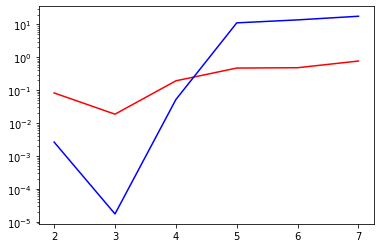

In [64]:
plt.semilogy(n_vals, i_norm_list, 'r')
plt.semilogy(n_vals, t_norm_list, 'b')

In [594]:
#Compare results for different values of n for the runge function
n_vals = np.arange(2, 6, 1)

error_equidistant=np.array([])
error_chebishev = np.array([])
error_optimised = np.array([])

eta = np.linspace(-1, 1, 1000)

#For lagrangian
for n in n_vals:
    print("This is n", n)
    x = np.linspace(-1,1,n)
    cheb = chebyshev(n)
    optimal, _, = new_gradient_descent(x, eta, [-1,1], runge)
    evalu = np.linspace(-1,1, 100)
    
    interp_equidistant = lagInterp(x, runge(x), evalu)
    #print(len(interp_equidistant))
    interp_chebishev = lagInterp(cheb, runge(cheb), evalu)
    interp_optimal = lagInterp(optimal, runge(optimal), evalu)
    
    error_equidistant=np.append(error_equidistant, twoNorm(runge(evalu), interp_equidistant, [-1,1]))
    error_chebishev =np.append(error_chebishev, twoNorm(runge(evalu), interp_chebishev, [-1,1]))
    error_optimised =np.append(error_optimised, twoNorm(runge(evalu), interp_optimal, [-1,1]))
    

    

This is n 2
This is norm 0.40321010346149316
This is x [-1.  1.]
We are in backtrack 10
This is norm 0.10622135828136883
This is x [ 0.42556299 -0.42556299]
We are in backtrack 10
We are in backtrack 5.0
This is norm 0.10710717780478624
This is x [ 0.6133376 -0.6133376]
We are in backtrack 10
We are in backtrack 5.0
We are in backtrack 2.5
This is norm 0.005282941522822171
This is x [ 0.51866733 -0.51866733]
We are in backtrack 10
We are in backtrack 5.0
We are in backtrack 2.5
This is norm 0.00020102611383564993
This is x [ 0.52333684 -0.52333684]
We are in backtrack 10
We are in backtrack 5.0
We are in backtrack 2.5
This is norm 8.042052585328272e-06
This is x [ 0.52315916 -0.52315916]
We are in backtrack 10
We are in backtrack 5.0
We are in backtrack 2.5
This is norm 3.2114879433653297e-07
This is x [ 0.52316626 -0.52316626]
We are in backtrack 10
We are in backtrack 5.0
We are in backtrack 2.5
100
This is n 3
This is norm 0.026463610445678208
This is x [-1.  0.  1.]
This is norm 0.

This is norm 0.0003435975657866744
This is x [-0.95661104 -0.61812373 -0.20630448  0.20630448  0.61812373  0.95661104]
This is norm 0.0003166736209117293
This is x [-0.9543633  -0.61896357 -0.20668568  0.20668568  0.61896357  0.9543633 ]
This is norm 0.0002921959333638215
This is x [-0.95229473 -0.61973935 -0.20705077  0.20705077  0.61973935  0.95229473]
This is norm 0.000269908577775919
This is x [-0.95039005 -0.62045911 -0.20740154  0.20740154  0.62045911  0.95039005]
This is norm 0.0002495897366890431
This is x [-0.94863546 -0.62112973 -0.20773951  0.20773951  0.62112973  0.94863546]
This is norm 0.0002310458218940873
This is x [-0.94701847 -0.62175704 -0.20806599  0.20806599  0.62175704  0.94701847]
This is norm 0.0002141068116587278
This is x [-0.94552775 -0.62234605 -0.20838207  0.20838207  0.62234605  0.94552775]
This is norm 0.00019862252137400522
This is x [-0.94415296 -0.62290105 -0.20868871  0.20868871  0.62290105  0.94415296]
This is norm 0.00018445959597764635
This is x [-

Text(0, 0.5, 'Two norm')

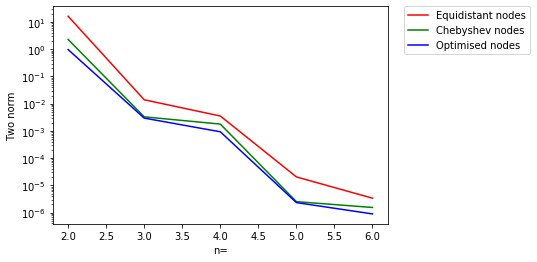

In [597]:
plt.semilogy(n_vals, error_equidistant, 'r', label = "Equidistant nodes")
plt.semilogy(n_vals, error_chebishev,'g', label = "Chebyshev nodes")
plt.semilogy(n_vals, error_optimised, 'b', label="Optimised nodes")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel("n=")
plt.ylabel("Two norm")

### Problem 1e)

In [49]:

def psi(x, shape):
    return np.exp(-((shape*x)**2))

def f_aprox(x, shape, eta, function):
    m = np.empty([(len(x)), (len(x))])
    for i in range(len(x)):
        for j in range(len(x)):
            m[i,j] = psi(np.abs(x[i]-x[j]), shape)
    f = function(x)
    #print("This is f", f)
    #print("This is m", m)
    w = np.linalg.solve(m,f)
    approx = 0
    for i in range(len(x)):
        approx += w[i]*psi(np.abs(eta-x[i]), shape)
    return approx

def cost2(x, shape, eta, interval, function):
    cost_val = 0
    func_eta = function(eta)
    aprox = np.array([])
    for i in range(len(eta)):
        aprox = np.append(aprox, f_aprox(x, shape, eta[i], function))
    aprox = np.sum((func_eta-aprox)**2)
    return ((interval[1]-interval[0])/len(eta))*aprox
    
def f_aprox_grad(x, shape, eta, function):
    m = np.empty([(len(x)), (len(x))])
    for i in range(len(x)):
        for j in range(len(x)):
            m[i,j] = psi(np.abs(x[i]-x[j]), shape)._value
    f = function(x)
    w = np.linalg.solve(m,f)
    approx = 0
    for i in range(len(x)):
        approx += w[i]*psi(np.abs(eta-x[i]), shape)
    return approx

def cost2_grad(x, shape, eta, interval, function):
    cost_val = 0
    func_eta = function(eta)
    aprox = np.array([])
    for i in range(len(eta)):
        aprox = np.append(aprox, f_aprox_grad(x, shape, eta[i], function))
    aprox = np.sum((func_eta-aprox)**2)
    return ((interval[1]-interval[0])/len(eta))*aprox
    
    
    
    
def f_3(x):
    return 0.75*(np.exp((-(9*x-2)**2)/4)+np.exp((-(9*x+1)**2)/49))+0.5*np.exp((-(9*x-7)**2)/4)-0.1*np.exp(-(9*x-4)**2)
    

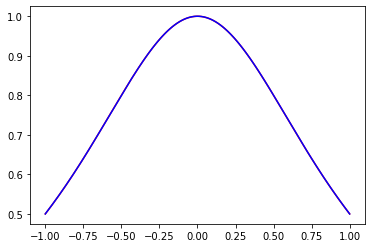

In [631]:
#Testing if our radial basis function works
x_true = np.linspace(-1,1,1000)
y_true = runge(x_true)

x = np.linspace(-1,1,10)
eta = np.linspace(-1,1,1000)

plt.plot(x_true, y_true, 'r',  eta, f_aprox(x, 1.5, eta, runge), 'b')

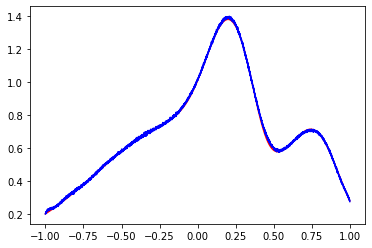

In [637]:
#Testing f_3, we see that we require a large n and eta for it to converge satisfactoraly
x_true = np.linspace(-1,1,1000)
y_true = f_3(x_true)

x = np.linspace(-1,1,40)
eta = np.linspace(-1,1,4000)

plt.plot(x_true, y_true, 'r',  eta, f_aprox(x, 1.5, eta, f_3), 'b')

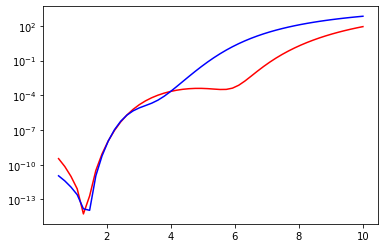

In [664]:
#Finding the best shape parameters to use as initial conditions for our algorithm. runge
norms_equi = np.array([])
norms_cheb = np.array([])
x = np.linspace(-1,1,10)
y = chebyshev(10)
eta = np.linspace(-1,1,1000)
for shape in np.linspace(0.5, 10.0, 50):
    norms_equi = np.append(norms_equi, twoNorm(runge(eta), f_aprox(x, shape, eta, runge), [-1,1]))
    norms_cheb = np.append(norms_cheb, twoNorm(runge(eta), f_aprox(y, shape, eta, runge), [-1,1]))
plt.semilogy(np.linspace(0.5, 10.0, 50), norms_equi, 'r', np.linspace(0.5, 10.0, 50), norms_cheb, 'b')

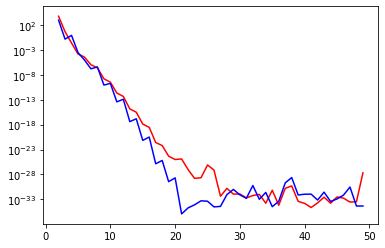

In [52]:
#Looking at the behaviour of the rbf as n increases
norms_equi = np.array([])
norms_cheb = np.array([])
n_vals = np.arange(2, 50, 1)
eta = np.linspace(-1,1,1000)
for n in n_vals:
    x = np.linspace(-1,1,n)
    y = chebyshev(n)
    norms_equi = np.append(norms_equi, twoNorm(runge(eta), f_aprox(x, 1.8, eta, runge), [-1,1]))
    norms_cheb = np.append(norms_cheb, twoNorm(runge(eta), f_aprox(y, 1.8, eta, runge), [-1,1]))
plt.semilogy(n_vals, norms_equi, 'r', n_vals, norms_cheb, 'b')

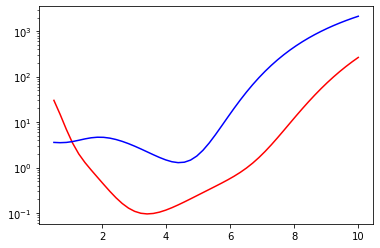

In [642]:
#Finding the best shape parameters to use as initial conditions for our algorithm. f_3 with 10 nodes
norms_equi = np.array([])
norms_cheb = np.array([])
x = np.linspace(-1,1,10)
y = chebyshev(10)
eta = np.linspace(-1,1,2000)
for shape in np.linspace(0.5, 10.0, 50):
    norms_equi = np.append(norms_equi, twoNorm(f_3(eta), f_aprox(x, shape, eta, f_3), [-1,1]))
    norms_cheb = np.append(norms_cheb, twoNorm(f_3(eta), f_aprox(y, shape, eta, f_3), [-1,1]))
plt.semilogy(np.linspace(0.5, 10.0, 50), norms_equi, 'r', np.linspace(0.5, 10.0, 50), norms_cheb, 'b')

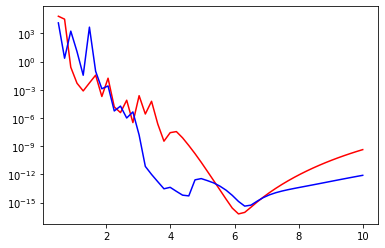

In [641]:
#Finding the best shape parameters to use as initial conditions for our algorithm. f_3 with 40 nodes
norms_equi = np.array([])
norms_cheb = np.array([])
x = np.linspace(-1,1,40)
y = chebyshev(40)
eta = np.linspace(-1,1,2000)
for shape in np.linspace(0.5, 10.0, 50):
    norms_equi = np.append(norms_equi, twoNorm(f_3(eta), f_aprox(x, shape, eta, f_3), [-1,1]))
    norms_cheb = np.append(norms_cheb, twoNorm(f_3(eta), f_aprox(y, shape, eta, f_3), [-1,1]))
plt.semilogy(np.linspace(0.5, 10.0, 50), norms_equi, 'r', np.linspace(0.5, 10.0, 50), norms_cheb, 'b')

In [ ]:
#From this we can surmise that the optimal shape parameter lies somewhere between 1 and 2 for the runge
#function and between 4 and 6 for f_3

In [256]:
y = np.linspace(-1,1,5)
shape = 4.0

In [257]:
grad_cost_2(y, shape, eta, [-1, 1], runge)

(array([-1.31204580e-01, -2.02574991e-01,  2.07371048e-16,  2.02574991e-01,
         1.31204580e-01]), array(0.10971655))

In [57]:
def gradient_descent2(x, shape, eta, interval, function, max_iter = 200, tol = 1e-15):
    x = x
    shape = shape
    c = 10**-4
    gradient = grad(cost2_grad,(0,1))
    combined = gradient(x,shape, eta, interval, function)
    p_k = -np.append(combined[0], combined[1])
    norm_p_k = np.linalg.norm(p_k)
    grad_norm_list = [norm_p_k]
    iterations_at_minima = 0
    
    while max_iter>0 and norm_p_k>tol:
        print("We are on iteration", max_iter)
        print("This is shape", shape)
        print("This is p_k", p_k)
        print("This is the norm", norm_p_k)
        print("This is x", x)
        alpha = 1
        #rhs = (cost2(x, shape, eta, interval, function)+c*alpha*((-p_k.T)@p_k))
        #lhs = cost2(x+alpha*p_k[:-1],shape + alpha*p_k[-1], eta, interval, function)
        #print (lhs, rhs)
        while cost2(x+alpha*p_k[:-1],shape + alpha*p_k[-1], eta, interval, function)>(cost2(x, shape, eta, interval, function)+c*alpha*((-p_k.T)@p_k)):
            #print("We are on alpha", alpha)
            alpha = 0.1*alpha
        x = x + alpha*p_k[:-1]
        shape = shape + alpha*p_k[-1]
        combined = gradient(x,shape, eta, interval, function)
        p_k = -np.append(combined[0], combined[1])
        norm_p_k = np.linalg.norm(p_k)
        max_iter -= 1
        
        grad_norm_list += [norm_p_k]
        
        if (np.abs(grad_norm_list[-1]-grad_norm_list[-2])<1e-20):
            print("Delta grad is", grad_norm_list[-1]-grad_norm_list[-2])
            print("Delta grad is smaller than 1e-17")
            if(iterations_at_minima >5):
                return x, shape, grad_norm_list
            else:
                iterations_at_minima += 1
        
    return x, shape, grad_norm_list

In [68]:
#x = chebyshev(5)
x = np.linspace(-1, 1, 5)
eta = np.linspace(-1,1,100)
shape = 1.8
nodes, shape_param, grad_norms = gradient_descent2(x, shape, eta, [-1,1], runge)

We are on iteration 200
This is shape 1.8
This is p_k [-5.44435636e-03  2.54314837e-03  1.30514225e-16 -2.54314837e-03
  5.44435636e-03  4.45521309e-03]
This is the norm 0.009595111429031637
This is x [-1.  -0.5  0.   0.5  1. ]
We are on iteration 199
This is shape 1.8044552130876412
This is p_k [-5.61117825e-03  2.54171669e-03  1.34703199e-17 -2.54171669e-03
  5.61117825e-03  4.67169034e-03]
This is the norm 0.009885139392981105
This is x [-1.00544436e+00 -4.97456852e-01  1.30514225e-16  4.97456852e-01
  1.00544436e+00]
We are on iteration 198
This is shape 1.8091269034255704
This is p_k [-5.74969718e-03  2.53373456e-03  1.19284062e-16 -2.53373456e-03
  5.74969718e-03  4.86023831e-03]
This is the norm 0.010128157453841097
This is x [-1.01105553e+00 -4.94915135e-01  1.43984545e-16  4.94915135e-01
  1.01105553e+00]
We are on iteration 197
This is shape 1.8139871417389954
This is p_k [-5.85311476e-03  2.51653776e-03 -7.99573430e-17 -2.51653776e-03
  5.85311476e-03  5.01456470e-03]
This i

KeyboardInterrupt: 

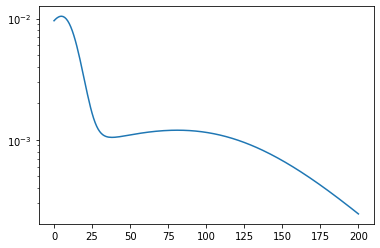

In [649]:
plt.semilogy(grad_norms)

In [651]:
#x = chebyshev(5)
x = np.linspace(-1, 1, 5)
eta = np.linspace(-1,1,100)
shape = 4.0
nodes, shape_param, grad_norms = gradient_descent2(x, shape, eta, [-1,1], f_3)

We are on iteration 200
This is shape 4.0
This is p_k [ 0.04258872  0.09354312  1.28888542 -0.4325641  -0.35537073 -0.13864659]
This is the norm 1.4157728228468223
This is x [-1.  -0.5  0.   0.5  1. ]
We are on iteration 199
This is shape 3.861353414146828
This is p_k [ 0.07807541 -0.09664548 -0.00642696  1.28345959  0.02874214 -0.10087632]
This is the norm 1.2937341678173375
This is x [-0.95741128 -0.40645688  1.28888542  0.0674359   0.64462927]
We are on iteration 198
This is shape 3.851265782489575
This is p_k [ 0.06409112  0.25791641 -0.00691379 -0.79195118  0.39157776 -0.05639365]
This is the norm 0.9243248354357545
This is x [-0.94960373 -0.41612142  1.28824273  0.19578186  0.64750348]
We are on iteration 197
This is shape 3.845626417337643
This is p_k [ 0.08180513 -0.04587339 -0.00382456  0.73445552  0.0208307  -0.07054665]
This is the norm 0.7440744181046163
This is x [-0.94319462 -0.39032978  1.28755135  0.11658674  0.68666126]
We are on iteration 196
This is shape 3.838571751

We are on iteration 167
This is shape 3.754051804367637
This is p_k [ 3.22525451e-02  8.81230407e-03  1.41378183e-04  1.78952440e-02
  5.52991502e-05 -1.31030005e-02]
This is the norm 0.040122746626607225
This is x [-0.75434903 -0.3165678   1.28537766  0.1797441   0.74819428]
We are on iteration 166
This is shape 3.752741504317681
This is p_k [ 0.02994354  0.01472091  0.00013538 -0.00987753  0.00665379 -0.01211819]
This is the norm 0.03744367294072475
This is x [-0.75112378 -0.31568657  1.2853918   0.18153363  0.74819981]
We are on iteration 165
This is shape 3.751529685020382
This is p_k [ 0.02896737  0.00885935  0.0001763   0.01303432  0.00090991 -0.01193277]
This is the norm 0.0350819061401235
This is x [-0.74812942 -0.31421448  1.28540533  0.18054587  0.74886519]
We are on iteration 164
This is shape 3.750336408189032
This is p_k [ 0.02700643  0.01280338  0.00017668 -0.00616252  0.00544586 -0.01114006]
This is the norm 0.03293994871150425
This is x [-0.74523269 -0.31332855  1.28542

Delta grad is 0.0
Delta grad is smaller than 1e-17


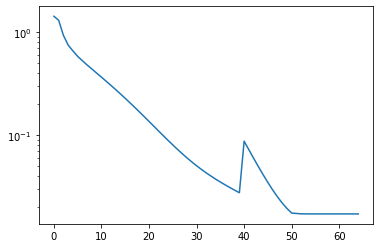

In [652]:
plt.semilogy(grad_norms)

In [66]:
#For larger vals of n and eta
x = np.linspace(-1, 1, 10)
eta = np.linspace(-1,1,1000)
shape = 4.0
nodes, shape_param, grad_norms = gradient_descent2(x, shape, eta, [-1,1], runge, 30)

KeyboardInterrupt: 

In [53]:
def piecewise_rbf(numberOfSubintervals, interval, function, shape, nodes=5):
    solution = np.array([])
    functionPoints = np.array([])
    subIntervals = np.linspace(interval[0], interval[1], numberOfSubintervals)
    for i in range(1, len(subIntervals)):
        x = np.linspace(subIntervals[i-1],subIntervals[i],nodes+1)
        eta = np.linspace(subIntervals[i-1],subIntervals[i], nodes*10)
        interpolation = f_aprox(x, shape, eta, function)
        subIntPoints = np.linspace(subIntervals[i-1],subIntervals[i],nodes*10)
        solution = np.append(solution, interpolation)
        functionPoints = np.append(functionPoints, subIntPoints)
    return solution, functionPoints, infNorm(function(functionPoints), solution), twoNorm(function(functionPoints), solution, interval)

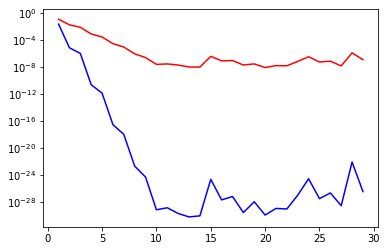

In [63]:
infList = np.array([])
twoList = np.array([])
n_vals = np.arange(1, 30, 1)

for n in n_vals:
    _, _, infl, twol = piecewise_rbf(8, [-1,1], runge, 4.0, n)
    infList = np.append(infList, infl)
    twoList = np.append(twoList, twol)
plt.semilogy(n_vals, infList, 'r', n_vals, twoList, 'b')

In [98]:
#For this comparison the ''unoptimised'' value of the shape parameter will be 
#We will compare RBF interpolation with optimised values, unoptimised values, and a piecewise implementation
#of RBF with the Runge function
n_vals = np.arange(2, 14, 1)
norm_optimal = np.array([])
norm_unoptimal = np.array([])
norm_piecewise = np.array([])

shape = 1.8

for n in n_vals:
    print("n=", n)
    equidistant = np.linspace(-1,1,n)
    eta = np.linspace(-1,1,1000)
    
    nodes, optimal_shape, _ = gradient_descent2(equidistant, shape, eta, [-1,1], runge, 20)
    print("Passed gradient descent stage")
    _, _, infl, twol = piecewise_rbf(8, [-1,1], runge, 4.0, n)
            
    norm_optimal = np.append(norm_optimal, twoNorm(runge(eta), f_aprox(nodes, optimal_shape, eta, runge), [-1,1]))
    norm_unoptimal = np.append(norm_unoptimal, twoNorm(runge(eta), f_aprox(equidistant, shape, eta, runge), [-1,1]))
    norm_piecewise = np.append(norm_piecewise, twol)

n= 2
We are on iteration 20
This is shape 1.8
This is p_k [ 0.68437846 -0.68437846 -0.36126892]
This is the norm 1.0330842132330915
This is x [-1.  1.]
We are on iteration 19
This is shape 1.4387310789041678
This is p_k [-0.05168947  0.05168947 -0.12527355]
This is the norm 0.14504159278722914
This is x [-0.31562154  0.31562154]
We are on iteration 18
This is shape 1.3134575338863226
This is p_k [-0.01003178  0.01003178 -0.06981987]
This is the norm 0.07124666879350816
This is x [-0.36731101  0.36731101]
We are on iteration 17
This is shape 1.2436376601281374
This is p_k [ 0.00312708 -0.00312708 -0.05635187]
This is the norm 0.05652513391219478
This is x [-0.37734278  0.37734278]
We are on iteration 16
This is shape 1.1872857883781753
This is p_k [ 0.00823686 -0.00823686 -0.05047297]
This is the norm 0.051799733665140214
This is x [-0.3742157  0.3742157]
We are on iteration 15
This is shape 1.1368128197805352
This is p_k [ 0.01072045 -0.01072045 -0.04580982]
This is the norm 0.04825345

Delta grad is 0.0
Delta grad is smaller than 1e-17
Passed gradient descent stage
n= 4
We are on iteration 20
This is shape 1.8
This is p_k [-0.0186301   0.05912797 -0.05912797  0.0186301   0.0028513 ]
This is the norm 0.08771843354221551
This is x [-1.         -0.33333333  0.33333333  1.        ]
We are on iteration 19
This is shape 1.8028513021361723
This is p_k [ 0.01155098 -0.01206585  0.01206585 -0.01155098 -0.01068175]
This is the norm 0.02592526501755403
This is x [-1.0186301  -0.27420537  0.27420537  1.0186301 ]
We are on iteration 18
This is shape 1.7921695533486681
This is p_k [ 0.00090545  0.00045166 -0.00045166 -0.00090545 -0.00130931]
This is the norm 0.0019395813717594382
This is x [-1.00707912 -0.28627122  0.28627122  1.00707912]
We are on iteration 17
This is shape 1.7908602429238316
This is p_k [ 0.00083311  0.00042759 -0.00042759 -0.00083311 -0.0012178 ]
This is the norm 0.0017991201987492826
This is x [-1.00617367 -0.28581956  0.28581956  1.00617367]
We are on iterati

We are on iteration 9
This is shape 1.8545666933620082
This is p_k [-4.80141699e-03  1.73918835e-03 -1.72207381e-16 -1.73918835e-03
  4.80141699e-03  4.43803917e-03]
This is the norm 0.008476612189638261
This is x [-1.06254021e+00 -4.74144551e-01  4.58773828e-16  4.74144551e-01
  1.06254021e+00]
We are on iteration 8
This is shape 1.8590047325363632
This is p_k [-4.44974532e-03  1.56753133e-03 -7.77924216e-17 -1.56753133e-03
  4.44974532e-03  4.14903486e-03]
This is the norm 0.007856797444306602
This is x [-1.06734162e+00 -4.72405363e-01  2.86566447e-16  4.72405363e-01
  1.06734162e+00]
We are on iteration 7
This is shape 1.8631537673977934
This is p_k [-4.07686520e-03  1.38810076e-03 -2.19382667e-16 -1.38810076e-03
  4.07686520e-03  3.83661611e-03]
This is the norm 0.0071982588396535905
This is x [-1.07179137e+00 -4.70837832e-01  2.08774025e-16  4.70837832e-01
  1.07179137e+00]
We are on iteration 6
This is shape 1.8669903835119785
This is p_k [-3.69512095e-03  1.20564118e-03 -1.12434

Delta grad is 0.0
Delta grad is smaller than 1e-17
Passed gradient descent stage
n= 8
We are on iteration 20
This is shape 1.8
This is p_k [-5.09205989e-04 -5.03171069e-04  8.60023363e-04  9.77046495e-05
 -9.77046495e-05 -8.60023363e-04  5.03171069e-04  5.09205989e-04
  5.36630089e-04]
This is the norm 0.0016766896998085768
This is x [-1.         -0.71428571 -0.42857143 -0.14285714  0.14285714  0.42857143
  0.71428571  1.        ]
We are on iteration 19
This is shape 1.8000000000000005
This is p_k [-5.09205989e-04 -5.03171069e-04  8.60023363e-04  9.77046495e-05
 -9.77046495e-05 -8.60023363e-04  5.03171069e-04  5.09205989e-04
  5.36630089e-04]
This is the norm 0.0016766896998083281
This is x [-1.         -0.71428571 -0.42857143 -0.14285714  0.14285714  0.42857143
  0.71428571  1.        ]
We are on iteration 18
This is shape 1.8000000000000005
This is p_k [-5.09205989e-04 -5.03171069e-04  8.60023363e-04  9.77046495e-05
 -9.77046495e-05 -8.60023363e-04  5.03171069e-04  5.09205989e-04
  5

We are on iteration 19
This is shape 1.8000000000000012
This is p_k [-1.00293677e-04 -3.08186299e-04  5.68840965e-04 -2.58326527e-04
  5.82541843e-05 -5.82541843e-05  2.58326527e-04 -5.68840965e-04
  3.08186299e-04  1.00293677e-04  1.14851114e-04]
This is the norm 0.001005325016292431
This is x [-1.         -0.77777778 -0.55555556 -0.33333333 -0.11111111  0.11111111
  0.33333333  0.55555556  0.77777778  1.        ]
Delta grad is 0.0
Delta grad is smaller than 1e-17
We are on iteration 18
This is shape 1.8000000000000012
This is p_k [-1.00293677e-04 -3.08186299e-04  5.68840965e-04 -2.58326527e-04
  5.82541843e-05 -5.82541843e-05  2.58326527e-04 -5.68840965e-04
  3.08186299e-04  1.00293677e-04  1.14851114e-04]
This is the norm 0.001005325016292431
This is x [-1.         -0.77777778 -0.55555556 -0.33333333 -0.11111111  0.11111111
  0.33333333  0.55555556  0.77777778  1.        ]
Delta grad is 0.0
Delta grad is smaller than 1e-17
We are on iteration 17
This is shape 1.8000000000000012
This

We are on iteration 19
This is shape 1.8
This is p_k [-2.56388671e-05 -1.51869035e-04  4.29708505e-04 -4.55611120e-04
  2.41761488e-04 -2.70191814e-05  2.70191814e-05 -2.41761488e-04
  4.55611120e-04 -4.29708505e-04  1.51869035e-04  2.56388671e-05
  2.22856933e-05]
This is the norm 0.0009750686395622261
This is x [-1.         -0.81818182 -0.63636364 -0.45454545 -0.27272727 -0.09090909
  0.09090909  0.27272727  0.45454545  0.63636364  0.81818182  1.        ]
Delta grad is 0.0
Delta grad is smaller than 1e-17
We are on iteration 18
This is shape 1.8
This is p_k [-2.56388671e-05 -1.51869035e-04  4.29708505e-04 -4.55611120e-04
  2.41761488e-04 -2.70191814e-05  2.70191814e-05 -2.41761488e-04
  4.55611120e-04 -4.29708505e-04  1.51869035e-04  2.56388671e-05
  2.22856933e-05]
This is the norm 0.0009750686395622261
This is x [-1.         -0.81818182 -0.63636364 -0.45454545 -0.27272727 -0.09090909
  0.09090909  0.27272727  0.45454545  0.63636364  0.81818182  1.        ]
Delta grad is 0.0
Delta g

Delta grad is 0.0
Delta grad is smaller than 1e-17
Passed gradient descent stage


In [78]:
norm_optimal

array([1.64440342e-03, 8.61304360e-05, 1.29480109e-06, 2.53030103e-06])

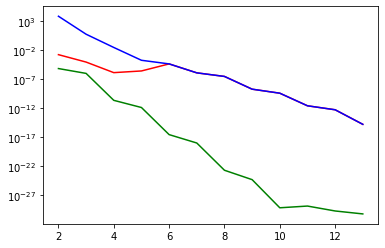

In [103]:
plt.semilogy(n_vals, norm_optimal, 'r', n_vals, norm_unoptimal, 'b', n_vals, norm_piecewise, 'g')

In [97]:
#For this comparison the ''unoptimised'' value of the shape parameter will be 
#We will compare RBF interpolation with optimised values, unoptimised values, and a piecewise implementation
#of RBF with the Runge function
n_vals = np.arange(2, 20, 1)
norm_ = np.array([])
norm_rbf = np.array([])

shape = 1.8

for n in n_vals:
    print("n=", n)
    equidistant = np.linspace(-1,1,n)
    eta = np.linspace(-1,1,1000)
    
    _, _, infl, twol_rbf = piecewise_rbf(8, [-1,1], runge, 4.0, n)
    _, _, infl, twol = pieceWise(8, [-1,1], runge, n)  
    norm_rbf = np.append(norm_rbf, twol_rbf)
    norm_ = np.append(norm_, twol)
    
    
    

n= 2
n= 3
n= 4
n= 5
n= 6
n= 7
n= 8
n= 9
n= 10
n= 11
n= 12
n= 13
n= 14


LinAlgError: Singular matrix

In [95]:
norm_rbf

array([6.57091816e-06, 9.57063977e-07, 2.15236628e-11, 1.24618309e-12,
       2.61497772e-17, 9.32495231e-19, 1.85106594e-23, 4.43726996e-25,
       6.17944904e-30, 1.22829672e-29, 1.73913309e-30, 5.40555554e-31,
       7.72292267e-31, 2.02578669e-25, 1.80810924e-28, 5.74452464e-28,
       2.38834951e-30, 9.58637098e-29])

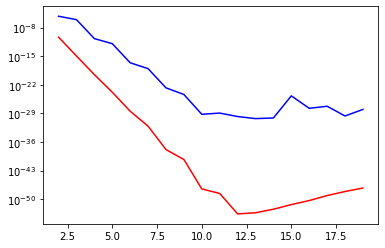

In [96]:
plt.semilogy(n_vals, norm_, 'r', n_vals, norm_rbf, 'b')